Importing required Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np


In [ ]:
data=pd.read_csv('/content/diabetes.csv')

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Selecting only 20 entries because KNN works well on small datasets

In [ ]:
my_data=data.head(20)

In [ ]:
my_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Lets first find which will be the best features to keep in ad which to drop

In [ ]:
#Finding correlation for feature selection
my_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.181410,-0.058186,-0.806660,-0.486759,-0.386041,-0.039599,0.182946,-0.015099
Glucose,0.181410,1.000000,0.219686,0.016168,0.553790,-0.072565,0.209934,0.667874,0.452664
BloodPressure,-0.058186,0.219686,1.000000,0.008259,0.036305,-0.314031,-0.041423,0.308379,0.098262
SkinThickness,-0.806660,0.016168,0.008259,1.000000,0.461601,0.450973,0.103832,0.043219,0.209843
Insulin,-0.486759,0.553790,0.036305,0.461601,1.000000,0.118807,-0.023130,0.491582,0.316934
BMI,-0.386041,-0.072565,-0.314031,0.450973,0.118807,1.000000,0.236690,-0.383225,-0.077424
DiabetesPedigreeFunction,-0.039599,0.209934,-0.041423,0.103832,-0.023130,0.236690,1.000000,0.174482,0.191270
Age,0.182946,0.667874,0.308379,0.043219,0.491582,-0.383225,0.174482,1.000000,0.289022
Outcome,-0.015099,0.452664,0.098262,0.209843,0.316934,-0.077424,0.191270,0.289022,1.000000


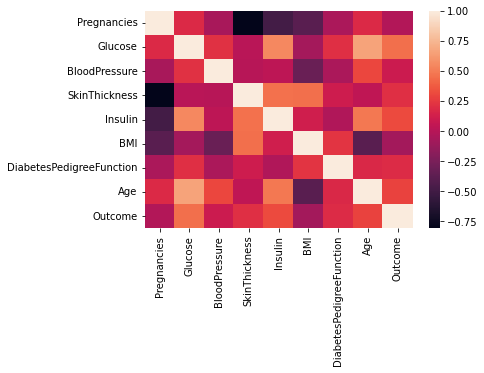

In [ ]:
sns.heatmap(my_data.corr());

In [ ]:
#From the above heatmap we come to know that glucose and insulin higly affects the output or target variable
#So we chose glucose and insulin columns for our KNN

In [ ]:
new_data=my_data.drop('Pregnancies',axis=1)

In [ ]:
#Dropping of features which are not needed
new_data1=new_data.drop('SkinThickness',axis=1)
new_data2=new_data1.drop('BloodPressure',axis=1)
new_data3=new_data2.drop('BMI',axis=1)
new_data4=new_data3.drop('Age',axis=1)
new_data5=new_data4.drop('DiabetesPedigreeFunction',axis=1)

In [ ]:
new_data5

,Glucose,Insulin,Outcome
0,148,0,1
1,85,0,0
2,183,0,1
3,89,94,0
4,137,168,1
5,116,0,0
6,78,88,1
7,115,0,0
8,197,543,1
9,125,0,1


In [ ]:
my_newdata=new_data5.drop('Outcome',axis=1)

In [ ]:
my_newdata

,Glucose,Insulin
0,148,0
1,85,0
2,183,0
3,89,94
4,137,168
5,116,0
6,78,88
7,115,0
8,197,543
9,125,0


In [ ]:
#Now we will take the glucose and insulin levels randomly...[160,35]
user_data=[160,35]

In [ ]:
columns=list(my_newdata)
columns

['Glucose', 'Insulin']

In [ ]:
#Now lets go through the data and find the distance between the users point and all other points or values of glucose and insulin

In [ ]:
data_arr=[]
dist_arr=[]
for i in range(0,20):
  for j in columns:
    print(my_newdata[j][i])
    elem= my_newdata[j][i]
    data_arr.append(elem)
  print(data_arr)
  dist=((user_data[0]-data_arr[0])**2+(user_data[1]-data_arr[1])**2)**0.5
  dist_arr.append(dist)
  data_arr=[]
    

148
0
[148, 0]
85
0
[85, 0]
183
0
[183, 0]
89
94
[89, 94]
137
168
[137, 168]
116
0
[116, 0]
78
88
[78, 88]
115
0
[115, 0]
197
543
[197, 543]
125
0
[125, 0]
110
0
[110, 0]
168
0
[168, 0]
139
0
[139, 0]
189
846
[189, 846]
166
175
[166, 175]
100
0
[100, 0]
118
230
[118, 230]
107
0
[107, 0]
103
83
[103, 83]
115
96
[115, 96]


In [ ]:
dist_arr

[37.0,
 82.76472678623425,
 41.88078318274385,
 92.31467922275417,
 134.97407158413796,
 56.22277118748239,
 97.63708311906906,
 57.0087712549569,
 509.3456586641335,
 49.49747468305833,
 61.032778078668514,
 35.90264614203248,
 40.8166632639171,
 811.5183300456004,
 140.12851244482687,
 69.46221994724903,
 199.47180251855147,
 63.51377803280167,
 74.51845409024533,
 75.8023746329889]

In [ ]:
result=pd.DataFrame(dist_arr)

In [ ]:
result

,0
0,37.000000
1,82.764727
2,41.880783
3,92.314679
4,134.974072
5,56.222771
6,97.637083
7,57.008771
8,509.345659
9,49.497475


In [ ]:
result['Glucose']=my_newdata['Glucose']

In [ ]:
result['Insulin']=my_newdata['Insulin']
result['Diabetes']=new_data5['Outcome']

In [ ]:
result

,0,Glucose,Insulin,Diabetes
0,37.000000,148,0,1
1,82.764727,85,0,0
2,41.880783,183,0,1
3,92.314679,89,94,0
4,134.974072,137,168,1
5,56.222771,116,0,0
6,97.637083,78,88,1
7,57.008771,115,0,0
8,509.345659,197,543,1
9,49.497475,125,0,1


In [ ]:
#For KNN we need to know the K value, K is usualy the sqrt(total number of entries)
#k is usually preferred to as odd number so K=5
k=5

In [ ]:
result.nsmallest(5,[0])

,0,Glucose,Insulin,Diabetes
11,35.902646,168,0,1
0,37.000000,148,0,1
12,40.816663,139,0,0
2,41.880783,183,0,1
9,49.497475,125,0,1


In [ ]:
#We clearly notice that the values of 1 is more so conclusion is Having the diabetes is more